✅ Toate cele 7 grafice au fost salvate.


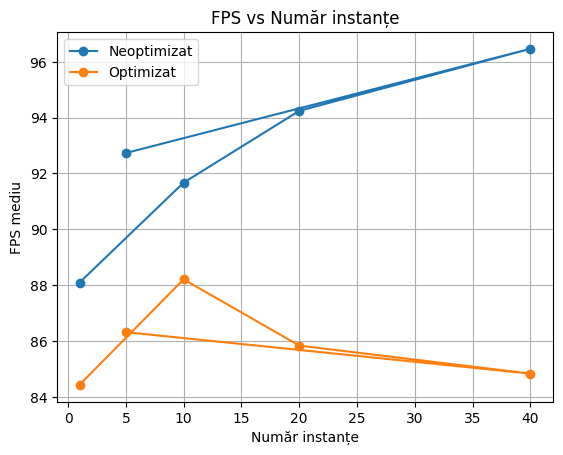

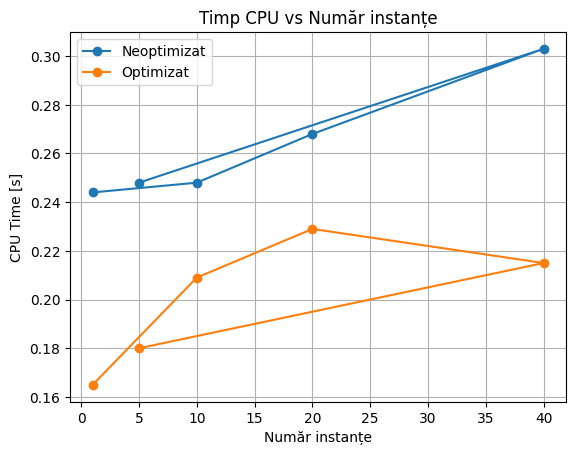

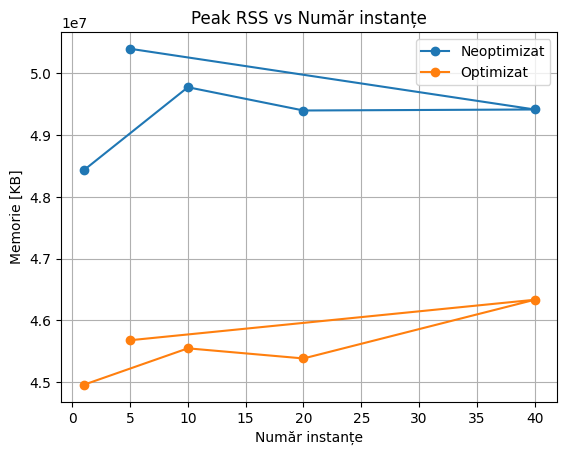

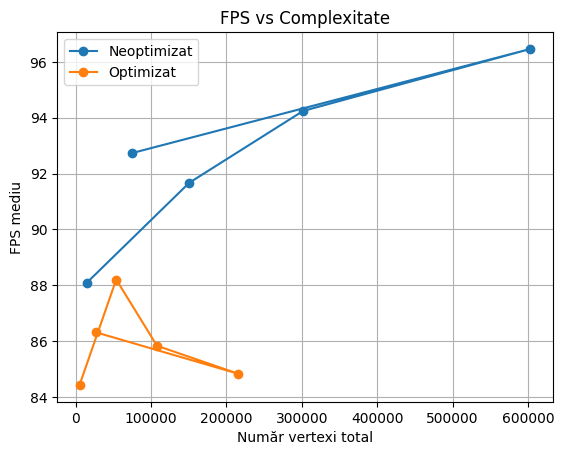

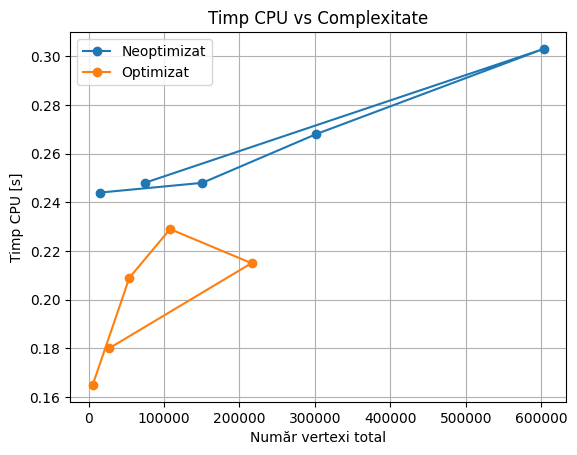

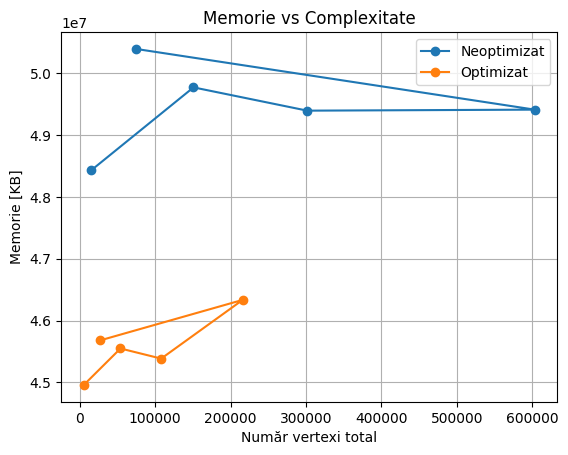

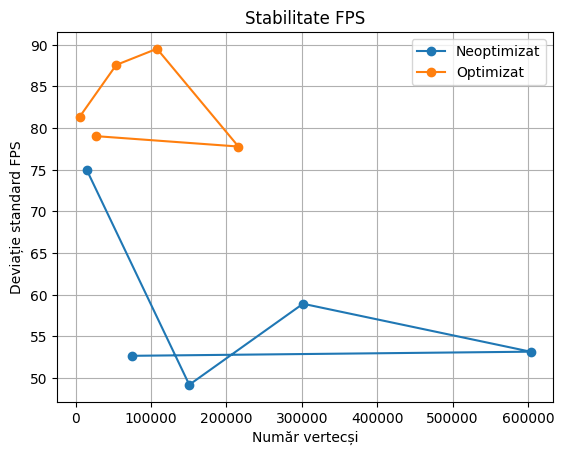

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def read_metrics_from_file(filename):
    # Citește ignorând liniile invalide
    df = pd.read_csv(filename, dtype=str, on_bad_lines='skip')

    # Păstrează doar rândurile numerice (frame-uri)
    df_numeric = df[df['frame'].apply(lambda x: x.isdigit())].astype({'dt_ms': float})
    avg_dt = df_numeric['dt_ms'].mean()
    std_dt = df_numeric['dt_ms'].std()
    fps = 1000.0 / avg_dt if avg_dt > 0 else 0

    # Citește ultimele linii manual
    with open(filename, "r", encoding="utf-8") as f:
        lines = f.readlines()[-4:]  # ultimele 4 linii

    cpu = float(lines[1].split(',')[1]) if 'cpu_time' in lines[1] else None
    rss = float(lines[2].split(',')[1]) if 'peak_rss_kb' in lines[2] else None
    verts = int(lines[3].split(',')[1]) if 'vertex_count' in lines[3] else None

    count = int(filename.split('_')[1].split('.')[0])  # ex: raw_10.csv → 10

    return {
        'count': count,
        'avg_fps': fps,
        'std_fps': 1000.0 * std_dt / (avg_dt ** 2) if avg_dt > 0 else 0,
        'cpu_time': cpu,
        'peak_rss_kb': rss,
        'vertex_count': verts
    }

# 🔍 Adună toate fișierele
all_files = os.listdir('.')
raw_files = sorted([f for f in all_files if f.startswith('raw_') and f.endswith('.csv')])
opt_files = sorted([f for f in all_files if f.startswith('opt_') and f.endswith('.csv')])

# 📊 Creează dataframe-urile
raw_data = [read_metrics_from_file(f) for f in raw_files]
opt_data = [read_metrics_from_file(f) for f in opt_files]
raw_df = pd.DataFrame(raw_data)
opt_df = pd.DataFrame(opt_data)

# === GRAFIC 1: FPS vs număr instanțe ===
plt.figure()
plt.plot(raw_df['count'], raw_df['avg_fps'], 'o-', label='Neoptimizat')
plt.plot(opt_df['count'], opt_df['avg_fps'], 'o-', label='Optimizat')
plt.xlabel('Număr instanțe')
plt.ylabel('FPS mediu')
plt.title('FPS vs Număr instanțe')
plt.legend()
plt.grid(True)
plt.savefig("fps_vs_count.png")

# === GRAFIC 2: CPU Time vs număr instanțe ===
plt.figure()
plt.plot(raw_df['count'], raw_df['cpu_time'], 'o-', label='Neoptimizat')
plt.plot(opt_df['count'], opt_df['cpu_time'], 'o-', label='Optimizat')
plt.xlabel('Număr instanțe')
plt.ylabel('CPU Time [s]')
plt.title('Timp CPU vs Număr instanțe')
plt.legend()
plt.grid(True)
plt.savefig("cpu_vs_count.png")

# === GRAFIC 3: Peak RSS vs număr instanțe ===
plt.figure()
plt.plot(raw_df['count'], raw_df['peak_rss_kb'], 'o-', label='Neoptimizat')
plt.plot(opt_df['count'], opt_df['peak_rss_kb'], 'o-', label='Optimizat')
plt.xlabel('Număr instanțe')
plt.ylabel('Memorie [KB]')
plt.title('Peak RSS vs Număr instanțe')
plt.legend()
plt.grid(True)
plt.savefig("mem_vs_count.png")

# === GRAFIC 4: FPS vs vertex_count ===
plt.figure()
plt.plot(raw_df['vertex_count'], raw_df['avg_fps'], 'o-', label='Neoptimizat')
plt.plot(opt_df['vertex_count'], opt_df['avg_fps'], 'o-', label='Optimizat')
plt.xlabel('Număr vertexi total')
plt.ylabel('FPS mediu')
plt.title('FPS vs Complexitate')
plt.legend()
plt.grid(True)
plt.savefig("fps_vs_vertex_count.png")

# === GRAFIC 5: CPU vs vertex_count ===
plt.figure()
plt.plot(raw_df['vertex_count'], raw_df['cpu_time'], 'o-', label='Neoptimizat')
plt.plot(opt_df['vertex_count'], opt_df['cpu_time'], 'o-', label='Optimizat')
plt.xlabel('Număr vertexi total')
plt.ylabel('Timp CPU [s]')
plt.title('Timp CPU vs Complexitate')
plt.legend()
plt.grid(True)
plt.savefig("cpu_vs_vertex_count.png")

# === GRAFIC 6: RSS vs vertex_count ===
plt.figure()
plt.plot(raw_df['vertex_count'], raw_df['peak_rss_kb'], 'o-', label='Neoptimizat')
plt.plot(opt_df['vertex_count'], opt_df['peak_rss_kb'], 'o-', label='Optimizat')
plt.xlabel('Număr vertexi total')
plt.ylabel('Memorie [KB]')
plt.title('Memorie vs Complexitate')
plt.legend()
plt.grid(True)
plt.savefig("mem_vs_vertex_count.png")

# === GRAFIC 7: Deviatie standard FPS ===
plt.figure()
plt.plot(raw_df['vertex_count'], raw_df['std_fps'], 'o-', label='Neoptimizat')
plt.plot(opt_df['vertex_count'], opt_df['std_fps'], 'o-', label='Optimizat')
plt.xlabel('Număr vertecși')
plt.ylabel('Deviație standard FPS')
plt.title('Stabilitate FPS')
plt.legend()
plt.grid(True)
plt.savefig("std_fps_vs_vertex_count.png")

print("✅ Toate cele 7 grafice au fost salvate.")

Optimizare

📉 Reducerea medie a vertexilor: -762.76%
✅ Grafice salvate: opt_time_vs_complexity.png, reduction_pct.png, verts_before_vs_after.png


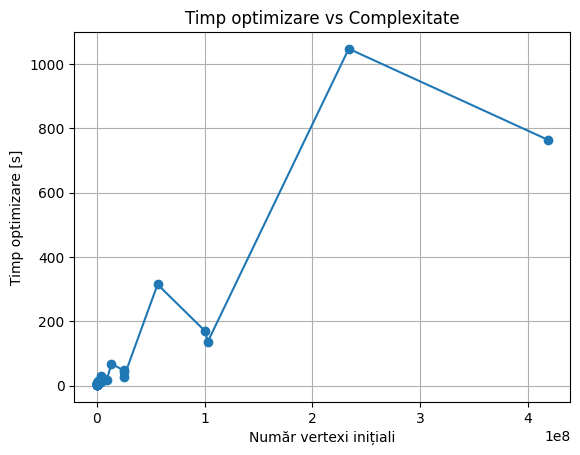

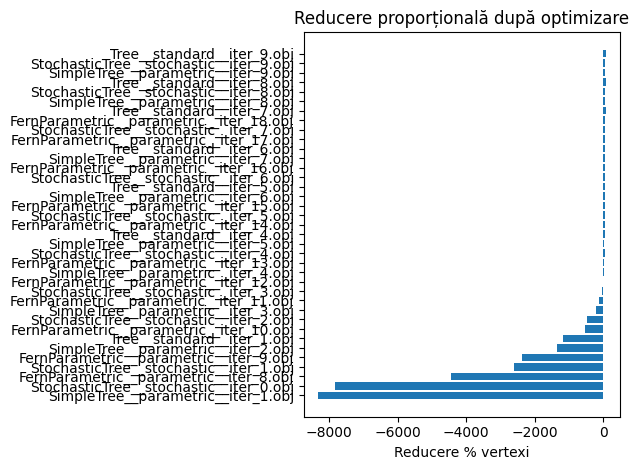

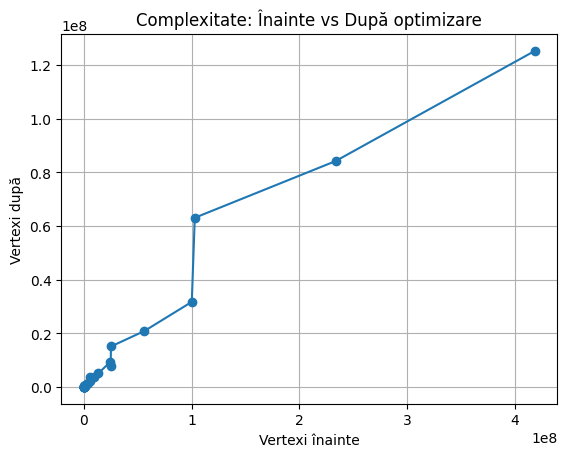

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Citește fișierul CSV (fără antet)
df = pd.read_csv("optimize_times.csv", header=None)
df.columns = ['filename', 'verts_before', 'opt_time_sec', 'verts_after']

# Sortează după numărul inițial de vertexi pentru claritate
df = df.sort_values(by='verts_before')

# Calculează reducerea procentuală
df['reduction_pct'] = 100 * (df['verts_before'] - df['verts_after']) / df['verts_before']

# ✅ Calculează media reducerii procentuale
mean_reduction = df['reduction_pct'].mean()
print(f"📉 Reducerea medie a vertexilor: {mean_reduction:.2f}%")

# === GRAFIC 1: Timp optimizare vs. vertexi inițiali ===
plt.figure()
plt.plot(df['verts_before'], df['opt_time_sec'], 'o-')
plt.xlabel('Număr vertexi inițiali')
plt.ylabel('Timp optimizare [s]')
plt.title('Timp optimizare vs Complexitate')
plt.grid(True)
plt.savefig("opt_time_vs_complexity.png")

# === GRAFIC 2: Reducere procentuală vertexi ===
plt.figure()
plt.barh(df['filename'], df['reduction_pct'])
plt.xlabel('Reducere % vertexi')
plt.title('Reducere proporțională după optimizare')
plt.tight_layout()
plt.savefig("reduction_pct.png")

# === GRAFIC 3: Vertexi inițiali vs finali ===
plt.figure()
plt.plot(df['verts_before'], df['verts_after'], 'o-')
plt.xlabel('Vertexi înainte')
plt.ylabel('Vertexi după')
plt.title('Complexitate: Înainte vs După optimizare')
plt.grid(True)
plt.savefig("verts_before_vs_after.png")

print("✅ Grafice salvate: opt_time_vs_complexity.png, reduction_pct.png, verts_before_vs_after.png")

Generare

✅ Grafice salvate: gen_time_vs_iter.png, txt_write_vs_iter.png, obj_gen_vs_iter.png, total_time_vs_iter.png, string_length_vs_iter.png


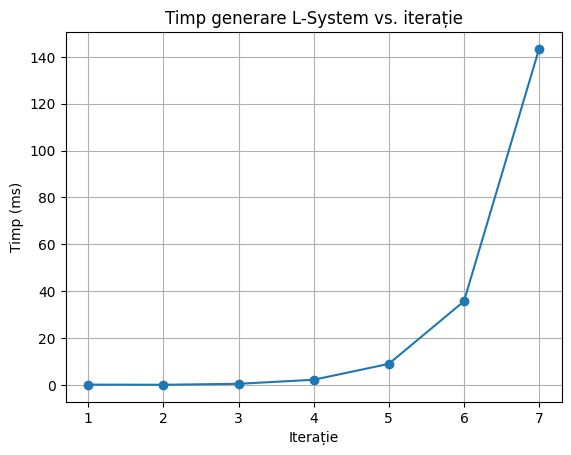

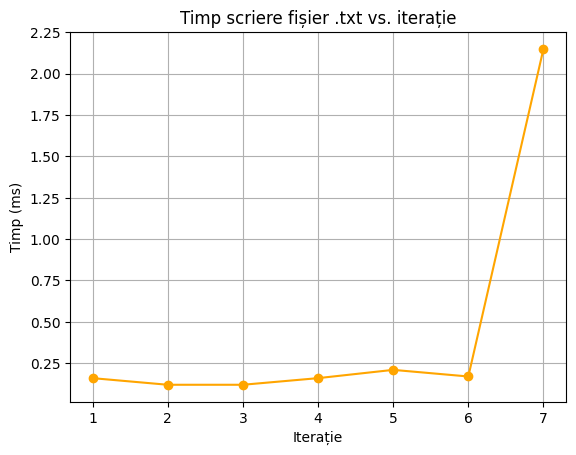

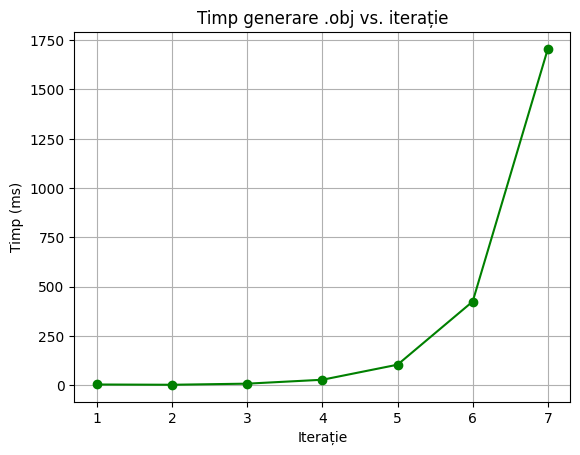

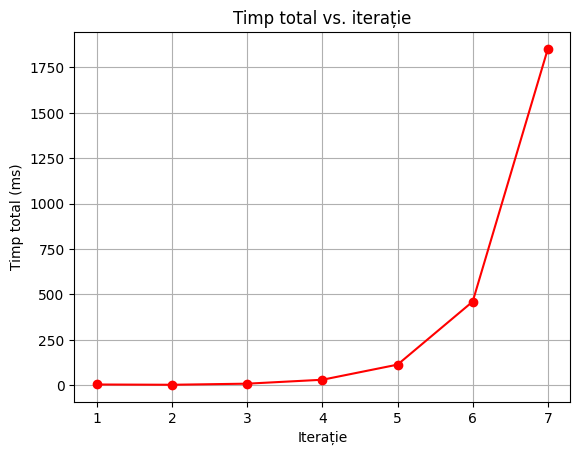

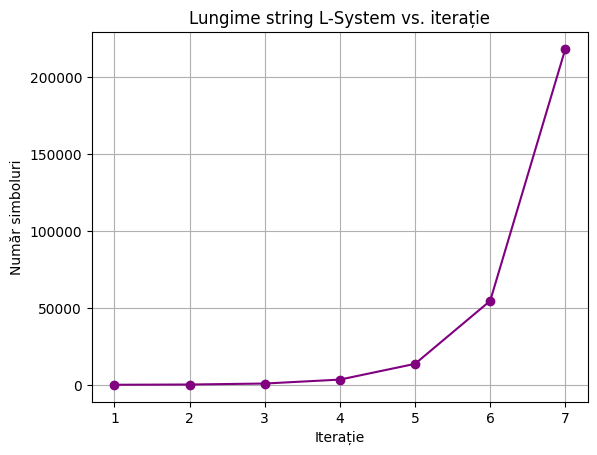

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# === Citire CSV ===
df = pd.read_csv("benchmark_full_generation.csv")

# Asigurare tipuri numerice
df['iteration'] = pd.to_numeric(df['iteration'], errors='coerce')
df['generate_ms'] = pd.to_numeric(df['generate_ms'], errors='coerce')
df['txt_write_ms'] = pd.to_numeric(df['txt_write_ms'], errors='coerce')
df['obj_gen_ms'] = pd.to_numeric(df['obj_gen_ms'], errors='coerce')
df['total_ms'] = pd.to_numeric(df['total_ms'], errors='coerce')
df['string_length'] = pd.to_numeric(df['string_length'], errors='coerce')

# Eliminare rânduri invalide
df = df.dropna()

# === 1. Timp generare L-System ===
plt.figure()
plt.plot(df['iteration'], df['generate_ms'], 'o-', label='Timp generare regulă')
plt.xlabel('Iterație')
plt.ylabel('Timp (ms)')
plt.title('Timp generare L-System vs. iterație')
plt.grid(True)
plt.savefig("gen_time_vs_iter.png")

# === 2. Timp scriere fișier TXT ===
plt.figure()
plt.plot(df['iteration'], df['txt_write_ms'], 'o-', label='Timp scriere .txt', color='orange')
plt.xlabel('Iterație')
plt.ylabel('Timp (ms)')
plt.title('Timp scriere fișier .txt vs. iterație')
plt.grid(True)
plt.savefig("txt_write_vs_iter.png")

# === 3. Timp generare .obj ===
plt.figure()
plt.plot(df['iteration'], df['obj_gen_ms'], 'o-', label='Timp generare .obj', color='green')
plt.xlabel('Iterație')
plt.ylabel('Timp (ms)')
plt.title('Timp generare .obj vs. iterație')
plt.grid(True)
plt.savefig("obj_gen_vs_iter.png")

# === 4. Timp total ===
plt.figure()
plt.plot(df['iteration'], df['total_ms'], 'o-', label='Timp total', color='red')
plt.xlabel('Iterație')
plt.ylabel('Timp total (ms)')
plt.title('Timp total vs. iterație')
plt.grid(True)
plt.savefig("total_time_vs_iter.png")

# === 5. Lungime string generat ===
plt.figure()
plt.plot(df['iteration'], df['string_length'], 'o-', label='Lungime șir', color='purple')
plt.xlabel('Iterație')
plt.ylabel('Număr simboluri')
plt.title('Lungime string L-System vs. iterație')
plt.grid(True)
plt.savefig("string_length_vs_iter.png")

print("✅ Grafice salvate: gen_time_vs_iter.png, txt_write_vs_iter.png, obj_gen_vs_iter.png, total_time_vs_iter.png, string_length_vs_iter.png")